In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('LACrimeData.csv')

In [3]:
data.shape

(901357, 28)

In [4]:
data.head() 

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [284]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION', 'Month',
       'Crime Category', 'Year', 'Day of Week', 'Hour of Day', 'Day Type',
       'YearMonth'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901357 entries, 0 to 901356
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           901357 non-null  int64  
 1   Date Rptd       901357 non-null  object 
 2   DATE OCC        901357 non-null  object 
 3   TIME OCC        901357 non-null  int64  
 4   AREA            901357 non-null  int64  
 5   AREA NAME       901357 non-null  object 
 6   Rpt Dist No     901357 non-null  int64  
 7   Part 1-2        901357 non-null  int64  
 8   Crm Cd          901357 non-null  int64  
 9   Crm Cd Desc     901357 non-null  object 
 10  Mocodes         775767 non-null  object 
 11  Vict Age        901357 non-null  int64  
 12  Vict Sex        781966 non-null  object 
 13  Vict Descent    781958 non-null  object 
 14  Premis Cd       901347 non-null  float64
 15  Premis Desc     900807 non-null  object 
 16  Weapon Used Cd  312268 non-null  float64
 17  Weapon Des

In [6]:
data.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,9.013570e+05,901357.000000,901357.000000,901357.000000,901357.000000,901357.000000,901357.000000,901347.000000,312268.000000,901346.000000,65683.000000,2213.000000,64.00000,901357.000000,901357.000000
mean,2.178185e+08,1336.869943,10.698448,1116.280358,1.411132,500.841333,29.626145,306.463376,363.443555,500.582883,957.898604,983.897876,991.21875,33.988170,-118.056984
std,1.174657e+07,653.074344,6.102033,610.216590,0.492039,207.636640,21.839342,217.314271,123.699130,207.427624,110.784425,52.186803,27.06985,1.708768,5.923780
min,8.170000e+02,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,101.000000,110.000000,210.000000,310.000000,821.00000,0.000000,-118.667600
25%,2.103209e+08,900.000000,5.000000,589.000000,1.000000,331.000000,0.000000,101.000000,310.000000,331.000000,998.000000,998.000000,998.00000,34.014500,-118.429600
50%,2.204166e+08,1415.000000,11.000000,1141.000000,1.000000,442.000000,31.000000,203.000000,400.000000,442.000000,998.000000,998.000000,998.00000,34.058600,-118.321500
75%,2.303202e+08,1900.000000,16.000000,1614.000000,2.000000,626.000000,45.000000,501.000000,400.000000,626.000000,998.000000,998.000000,998.00000,34.163400,-118.273900
max,2.499046e+08,2359.000000,21.000000,2199.000000,2.000000,956.000000,120.000000,976.000000,516.000000,956.000000,999.000000,999.000000,999.00000,34.334300,0.000000


In [7]:
data.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           125590
Vict Age               0
Vict Sex          119391
Vict Descent      119399
Premis Cd             10
Premis Desc          550
Weapon Used Cd    589089
Weapon Desc       589089
Status                 0
Status Desc            0
Crm Cd 1              11
Crm Cd 2          835674
Crm Cd 3          899144
Crm Cd 4          901293
LOCATION               0
Cross Street      759302
LAT                    0
LON                    0
dtype: int64

In [8]:
data = data.drop(['Weapon Used Cd', 'Weapon Desc', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street'], axis=1)

In [9]:
data.shape

(901357, 22)

In [10]:
data.isna().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
TIME OCC             0
AREA                 0
AREA NAME            0
Rpt Dist No          0
Part 1-2             0
Crm Cd               0
Crm Cd Desc          0
Mocodes         125590
Vict Age             0
Vict Sex        119391
Vict Descent    119399
Premis Cd           10
Premis Desc        550
Status               0
Status Desc          0
Crm Cd 1            11
LOCATION             0
LAT                  0
LON                  0
dtype: int64

In [11]:
data.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,M,H,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,34.0944,-118.3277


In [12]:
data['Mocodes'].fillna('Unknown', inplace=True)
data['Vict Sex'].fillna(data['Vict Sex'].mode()[0], inplace=True)
data['Vict Descent'].fillna(data['Vict Descent'].mode()[0], inplace=True)
data['Premis Cd'].fillna(data['Premis Cd'].mode()[0], inplace=True)
data['Premis Desc'].fillna('Unknown', inplace=True)
data['Crm Cd 1'].fillna(data['Crm Cd 1'].mode()[0], inplace=True)

In [13]:
print(data.duplicated().sum())

0


In [14]:
data.isna().sum()

DR_NO           0
Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Rpt Dist No     0
Part 1-2        0
Crm Cd          0
Crm Cd Desc     0
Mocodes         0
Vict Age        0
Vict Sex        0
Vict Descent    0
Premis Cd       0
Premis Desc     0
Status          0
Status Desc     0
Crm Cd 1        0
LOCATION        0
LAT             0
LON             0
dtype: int64

In [15]:
data['Date Rptd'] = pd.to_datetime(data['Date Rptd'])
data['DATE OCC'] = pd.to_datetime(data['DATE OCC'])


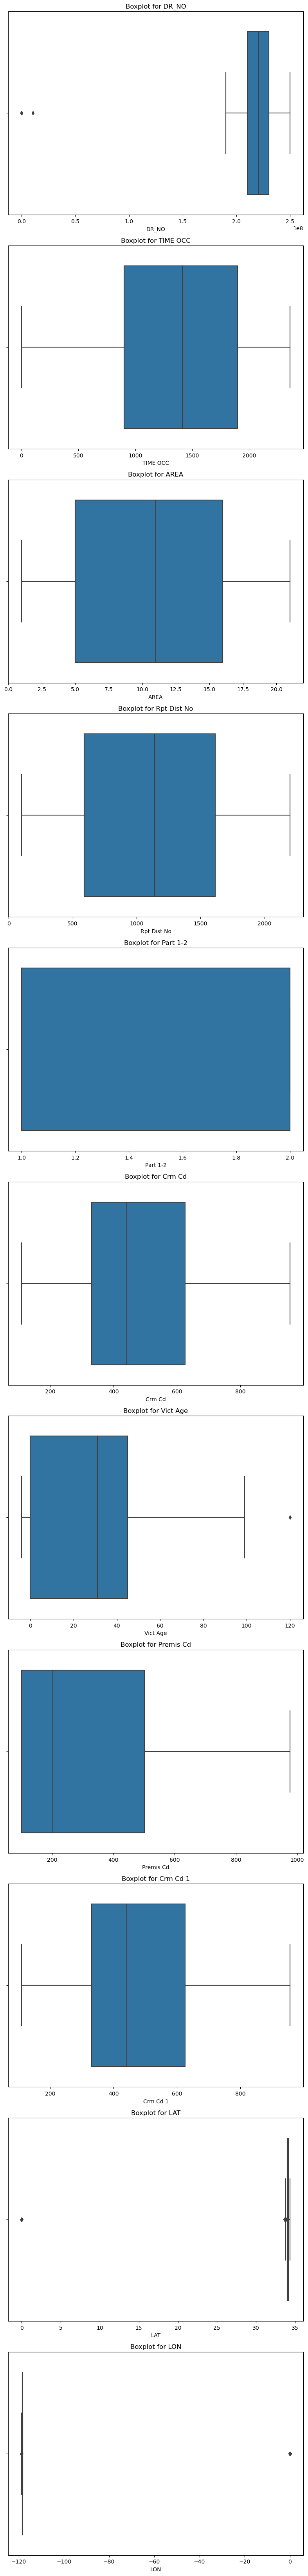

In [16]:
# Step 1: Identify and visualize outliers for each numerical column
num_columns = data.select_dtypes(include=['number']).columns
num_plots = len(num_columns)

fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(8, 6 * num_plots))

for i, column in enumerate(num_columns):
    # Visualize distribution and identify outliers using boxplot
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [17]:
# Step 2: Handle outliers for each numerical column (excluding 'LAT' and 'LON')
for column in num_columns:
    if column not in ['LAT', 'LON']:
        # Calculate the IQR for outlier detection
        q1 = data[column].quantile(0.25)
        q3 = data[column].quantile(0.75)
        iqr = q3 - q1

        # Define the upper and lower bounds for outliers
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

        # Handle outliers (e.g., set to NaN or correct)
        # For demonstration, let's replace outliers with NaN
        data[column] = data[column].where((data[column] >= lower_bound) & (data[column] <= upper_bound), other=None)


In [18]:
data.drop(columns = ['LON','LAT'],axis =1,inplace=True)

In [19]:
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Status', 'Status Desc', 'Crm Cd 1', 'LOCATION'],
      dtype='object')

In [20]:
data.shape

(901357, 20)

In [21]:
mean_age = data[data['Vict Age'] != 0]['Vict Age'].mean()

In [22]:
mean_age_rounded = int(round(mean_age))

In [23]:
data['Vict Age'] = data['Vict Age'].replace(0, mean_age_rounded)

In [24]:
negative_age = (data['Vict Age']<0)

In [25]:
negative_age

0         False
1         False
2         False
3         False
4         False
          ...  
901352    False
901353    False
901354    False
901355    False
901356    False
Name: Vict Age, Length: 901357, dtype: bool

In [26]:
data.shape

(901357, 20)

In [27]:
data.describe()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1
count,9.013510e+05,901357,901357,901357.000000,901357.000000,901357.000000,901357.000000,901357.000000,901356.000000,901357.000000,901357.000000
mean,2.178199e+08,2022-02-27 00:51:33.543623680,2022-02-15 23:27:23.014699264,1336.869943,10.698448,1116.280358,1.411132,500.841333,39.677656,306.461097,500.582998
min,1.901011e+08,2020-01-01 00:00:00,2020-01-01 00:00:00,1.000000,1.000000,101.000000,1.000000,110.000000,-4.000000,101.000000,110.000000
25%,2.103209e+08,2021-03-02 00:00:00,2021-02-17 00:00:00,900.000000,5.000000,589.000000,1.000000,331.000000,31.000000,101.000000,331.000000
50%,2.204166e+08,2022-03-22 00:00:00,2022-03-08 00:00:00,1415.000000,11.000000,1141.000000,1.000000,442.000000,40.000000,203.000000,442.000000
75%,2.303202e+08,2023-03-02 00:00:00,2023-02-18 00:00:00,1900.000000,16.000000,1614.000000,2.000000,626.000000,45.000000,501.000000,626.000000
max,2.499046e+08,2024-02-19 00:00:00,2024-02-19 00:00:00,2359.000000,21.000000,2199.000000,2.000000,956.000000,99.000000,976.000000,956.000000
std,1.173336e+07,NaN,NaN,653.074344,6.102033,610.216590,0.492039,207.636640,13.505503,217.314143,207.426361


In [28]:
data['Crm Cd Desc'].unique()

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'RAPE, FORCIBLE', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)', 'BURGLARY', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)',

In [29]:
most_common_crimes = data['Crm Cd 1'].value_counts().head(10)
print("Top 10 Most Common Types of Crimes:")
print(most_common_crimes)

Top 10 Most Common Types of Crimes:
Crm Cd 1
510.0    96746
624.0    71973
354.0    55752
330.0    55647
310.0    55208
740.0    54768
230.0    51326
440.0    45997
626.0    45203
420.0    34646
Name: count, dtype: int64


In [30]:
# Create a new column for the month of occurrence
data['Month'] = data['DATE OCC'].dt.month

# Define a function to map crime types to categories
def map_to_category(crime_type):
    # Example mapping: Group common crime types into broader categories
    if crime_type in [440, 510, 354, 420]:
        return 'Theft'
    elif crime_type in [230, 624, 626]:
        return 'Assault'
    elif crime_type in [330, 310, 740]:
        return 'Burglary'
    else:
        return 'Other'


In [31]:
# Apply the mapping function to create a new 'Crime Category' column
data['Crime Category'] = data['Crm Cd 1'].apply(map_to_category)

In [32]:
data.shape

(901357, 22)

In [33]:
data.to_csv('cleaned.csv')

In [34]:
df = pd.read_csv('cleaned.csv')

In [35]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,Month,Crime Category
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,3,Theft
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,Central,182,1,330,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,2,Burglary
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,11,Other
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,...,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,3,Other
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,...,M,H,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,8,Theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,...,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,3,Assault
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,Hollywood,647,2,901,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,901.0,1500 N BRONSON AV,12,Other
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,Central,154,1,352,...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,7,Other
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,3,Other


In [36]:
df['Vict Age'].head(50)

0     40.0
1     47.0
2     19.0
3     19.0
4     28.0
5     41.0
6     25.0
7     27.0
8     24.0
9     26.0
10    26.0
11     8.0
12     7.0
13     8.0
14    40.0
15    13.0
16    56.0
17    22.0
18    23.0
19    31.0
20    30.0
21    57.0
22    56.0
23    10.0
24    12.0
25     7.0
26    40.0
27    46.0
28    30.0
29    40.0
30    51.0
31    24.0
32    37.0
33    27.0
34    20.0
35    40.0
36    40.0
37    29.0
38    26.0
39    33.0
40    34.0
41    15.0
42    65.0
43    59.0
44    15.0
45     9.0
46    33.0
47    34.0
48    35.0
49    -2.0
Name: Vict Age, dtype: float64

In [37]:
negative_age = df[df['Vict Age']<0]

In [38]:
negative_age['Vict Age'].head()

49    -2.0
149   -2.0
381   -2.0
585   -1.0
599   -1.0
Name: Vict Age, dtype: float64

In [39]:
df['Vict Age'] = df['Vict Age'].mask(df['Vict Age']<0)
df['Vict Age'].fillna(df['Vict Age'].mean() , inplace =True)
df['Vict Age'] = df['Vict Age'].round().astype(int)

In [40]:
df['Vict Age'].head(50)

0     40
1     47
2     19
3     19
4     28
5     41
6     25
7     27
8     24
9     26
10    26
11     8
12     7
13     8
14    40
15    13
16    56
17    22
18    23
19    31
20    30
21    57
22    56
23    10
24    12
25     7
26    40
27    46
28    30
29    40
30    51
31    24
32    37
33    27
34    20
35    40
36    40
37    29
38    26
39    33
40    34
41    15
42    65
43    59
44    15
45     9
46    33
47    34
48    35
49    40
Name: Vict Age, dtype: int32

In [41]:
# Group by month and crime category, then count occurrences
crime_distribution = data.groupby(['Month', 'Crime Category']).size().reset_index(name='Count')

In [42]:
# Pivot the table for better visualization
crime_pivot = crime_distribution.pivot(index='Month', columns='Crime Category', values='Count')

<Figure size 1400x800 with 0 Axes>

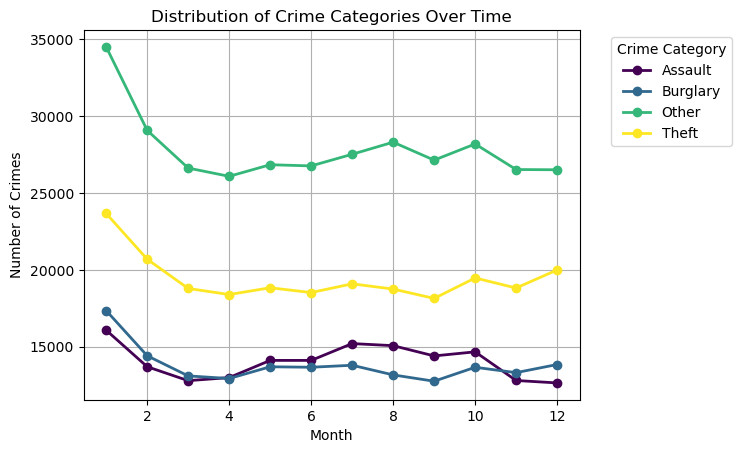

In [43]:
# Plot the distribution of crime categories over time using a line plot
plt.figure(figsize=(14, 8))
crime_pivot.plot(kind='line', marker='o', colormap='viridis', linewidth=2)
plt.title('Distribution of Crime Categories Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

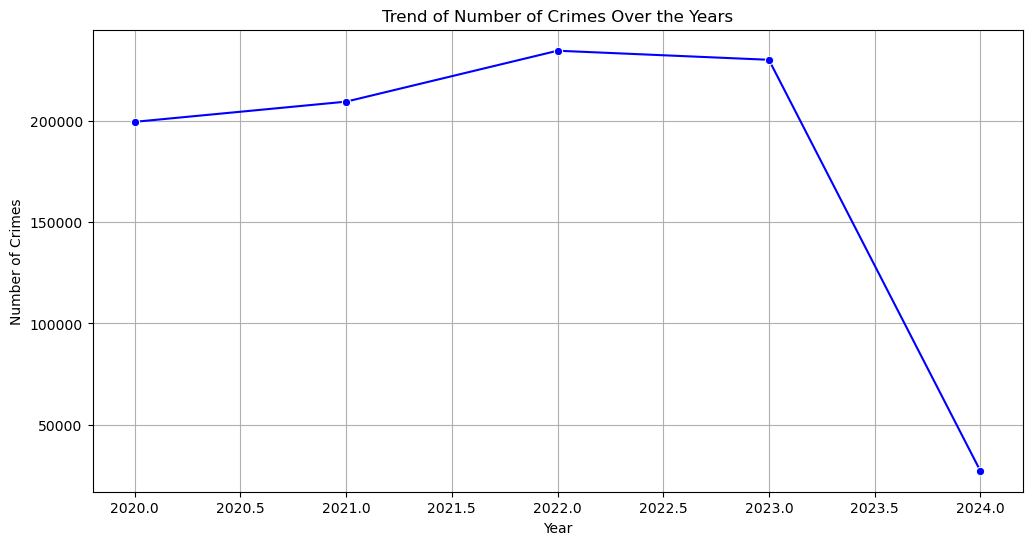

In [44]:
# Extract the year from the 'DATE OCC' column
data['Year'] = data['DATE OCC'].dt.year

# Group by year and count the number of crimes
crimes_by_year = data['Year'].value_counts().sort_index()

# Plot the trend of the number of crimes over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x=crimes_by_year.index, y=crimes_by_year.values, marker='o', color='blue')
plt.title('Trend of Number of Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.grid(True)
plt.show()

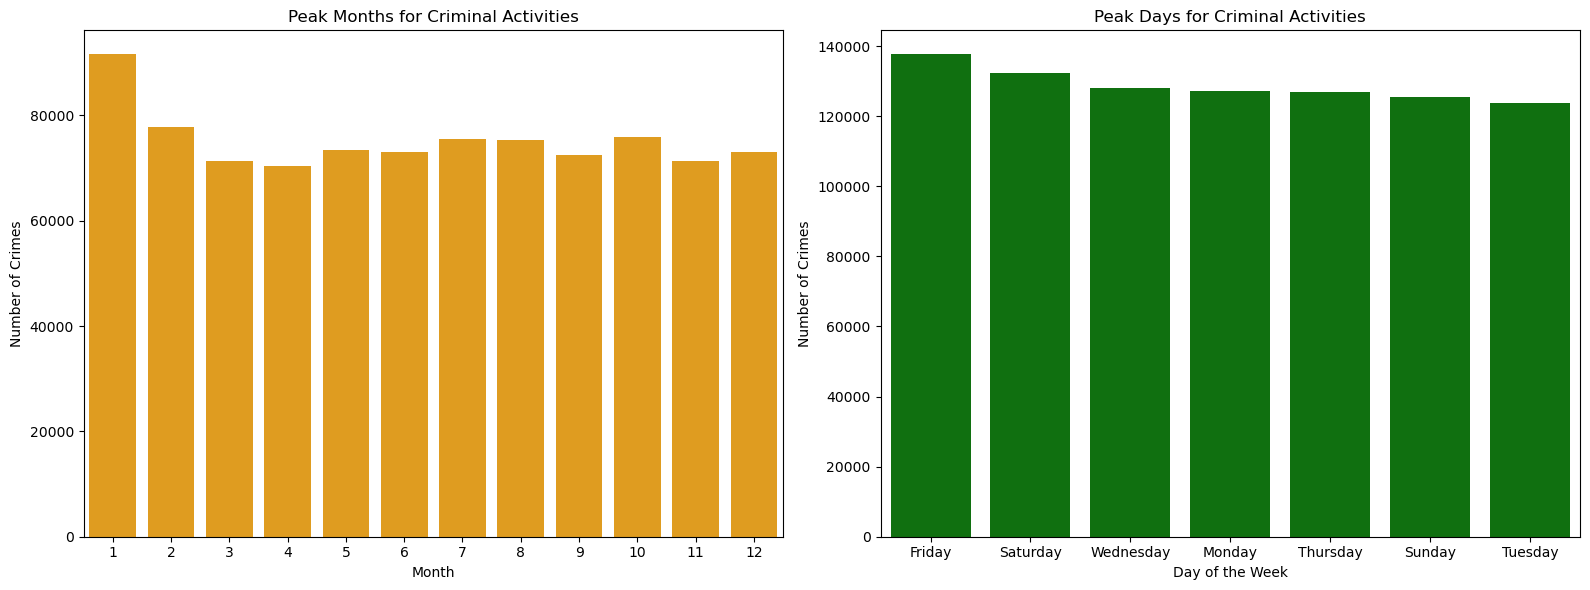

In [45]:
# Extract the month and day of the week from the 'DATE OCC' column
data['Month'] = data['DATE OCC'].dt.month
data['Day of Week'] = data['DATE OCC'].dt.day_name()

# Group by month and day of the week and count the number of crimes
crimes_by_month = data['Month'].value_counts().sort_index()
crimes_by_day = data['Day of Week'].value_counts()

# Plot the peak months and days for criminal activities
plt.figure(figsize=(16, 6))

# Plot for peak months
plt.subplot(1, 2, 1)
sns.barplot(x=crimes_by_month.index, y=crimes_by_month.values, color='orange')
plt.title('Peak Months for Criminal Activities')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')

# Plot for peak days
plt.subplot(1, 2, 2)
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='green')
plt.title('Peak Days for Criminal Activities')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

plt.tight_layout()
plt.show()

In [46]:
data['AREA'].unique()

array([ 7,  1,  3,  9,  6, 18, 13, 19,  2,  4, 10,  8, 20, 21, 11, 12, 14,
       15,  5, 16, 17], dtype=int64)

In [47]:
data['AREA NAME'].unique()

array(['Wilshire', 'Central', 'Southwest', 'Van Nuys', 'Hollywood',
       'Southeast', 'Newton', 'Mission', 'Rampart', 'Hollenbeck',
       'West Valley', 'West LA', 'Olympic', 'Topanga', 'Northeast',
       '77th Street', 'Pacific', 'N Hollywood', 'Harbor', 'Foothill',
       'Devonshire'], dtype=object)

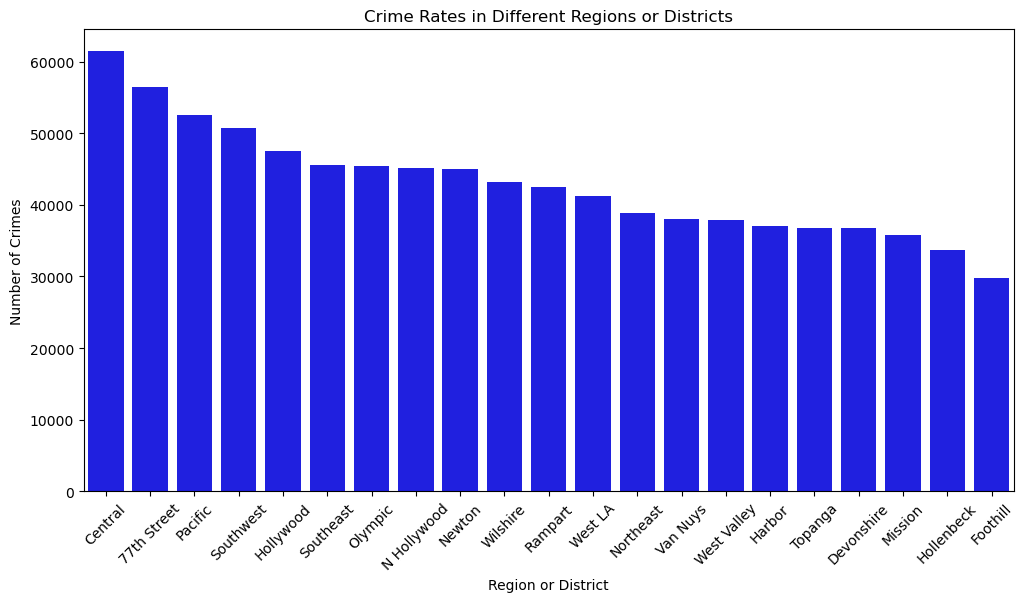

In [286]:
crimes_by_area = data['AREA NAME'].value_counts()

# Plot the crime rates in different regions or districts
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_by_area.index, y=crimes_by_area.values, color='blue')
plt.xticks(rotation=45)
plt.title('Crime Rates in Different Regions or Districts')
plt.xlabel('Region or District')
plt.ylabel('Number of Crimes')
plt.show()

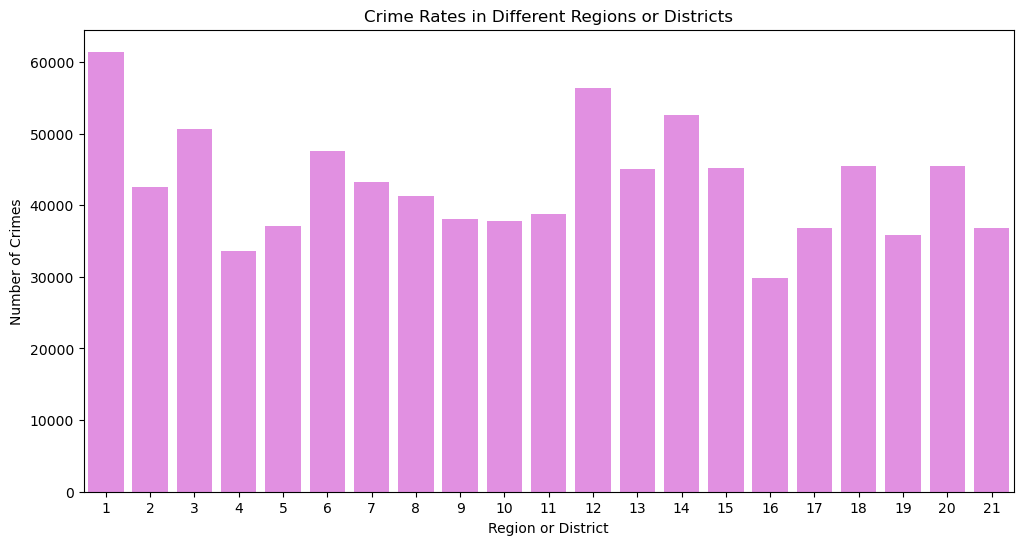

In [49]:
crimes_by_area = data['AREA'].value_counts()

# Plot the crime rates in different regions or districts
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_by_area.index, y=crimes_by_area.values, color='violet')
plt.title('Crime Rates in Different Regions or Districts')
plt.xlabel('Region or District')
plt.ylabel('Number of Crimes')
plt.show()

In [50]:
data['Rpt Dist No'].unique()

array([ 784,  182,  356, ..., 1013,  995, 1046], dtype=int64)

In [51]:
data['Rpt Dist No'].nunique()

1207

In [52]:
no_of_crimes = data['Rpt Dist No'].value_counts().head(10)
print("Top 10 crime variation across different neighbourhoods:")
print(no_of_crimes)

Top 10 crime variation across different neighbourhoods:
Rpt Dist No
162     4805
645     4482
182     4316
1494    4189
646     3992
636     3612
2156    3506
111     3486
1822    2964
152     2797
Name: count, dtype: int64


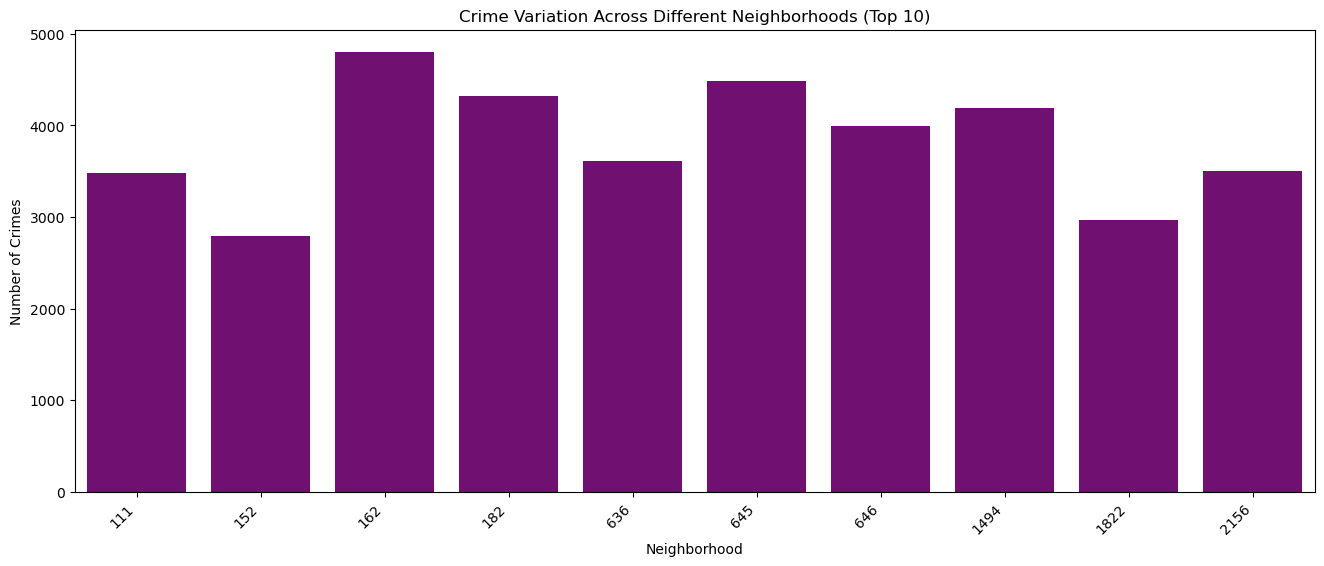

In [53]:
# Group by 'Rpt Dist No' and count the number of crimes
crimes_by_neighborhood = data['Rpt Dist No'].value_counts()

# Plot the crime variation across different neighborhoods
plt.figure(figsize=(16, 6))
sns.barplot(x=crimes_by_neighborhood.index[:10], y=crimes_by_neighborhood.values[:10], color='purple')
plt.title('Crime Variation Across Different Neighborhoods (Top 10)')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

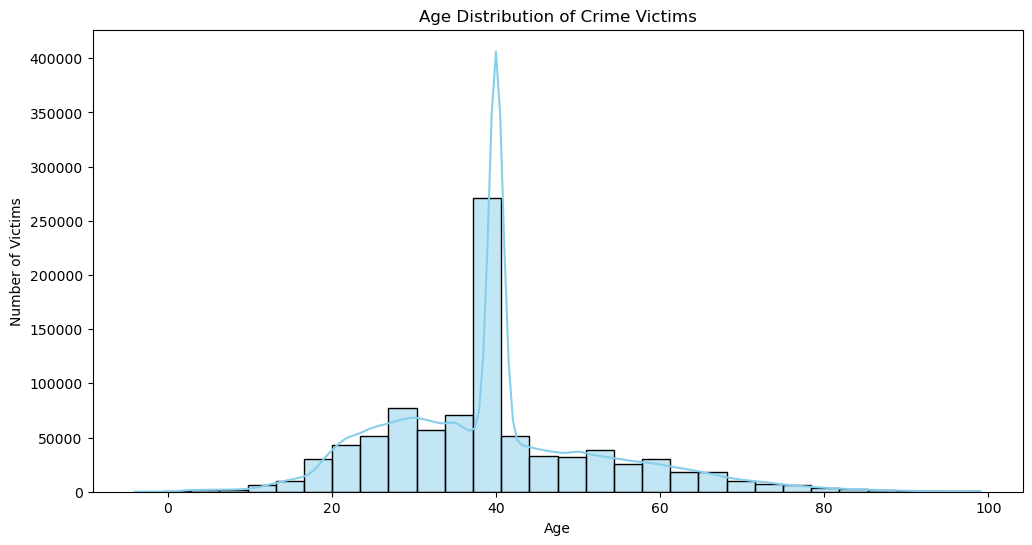

In [54]:
# Plot the age distribution of crime victims
plt.figure(figsize=(12, 6))
sns.histplot(data['Vict Age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Crime Victims')
plt.xlabel('Age')
plt.ylabel('Number of Victims')
plt.show()

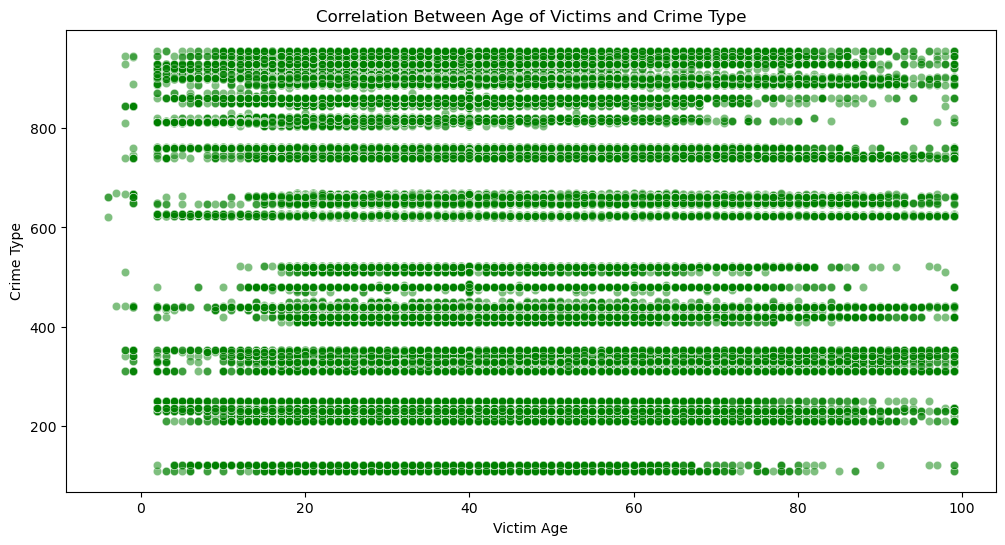

In [55]:
# Plot a scatter plot to show the correlation between age and crime type
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Vict Age', y='Crm Cd 1', data=data, alpha=0.5, color='green')
plt.title('Correlation Between Age of Victims and Crime Type')
plt.xlabel('Victim Age')
plt.ylabel('Crime Type')
plt.show()

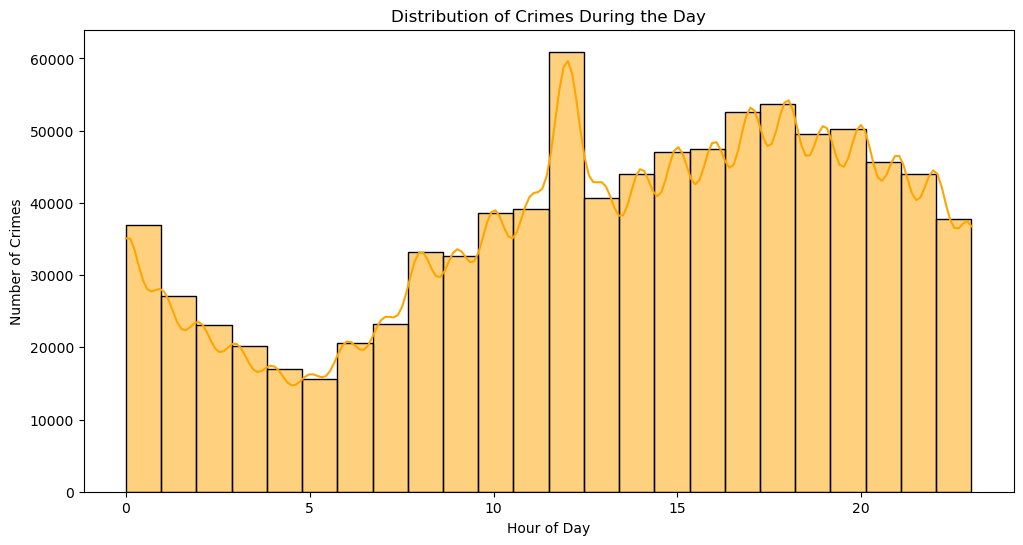

In [56]:
# Extract the hour from the 'TIME OCC' column
data['Hour of Day'] = data['TIME OCC'] // 100

# Plot the distribution of crimes during the day
plt.figure(figsize=(12, 6))
sns.histplot(data['Hour of Day'].dropna(), bins=24, kde=True, color='orange')
plt.title('Distribution of Crimes During the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.show()

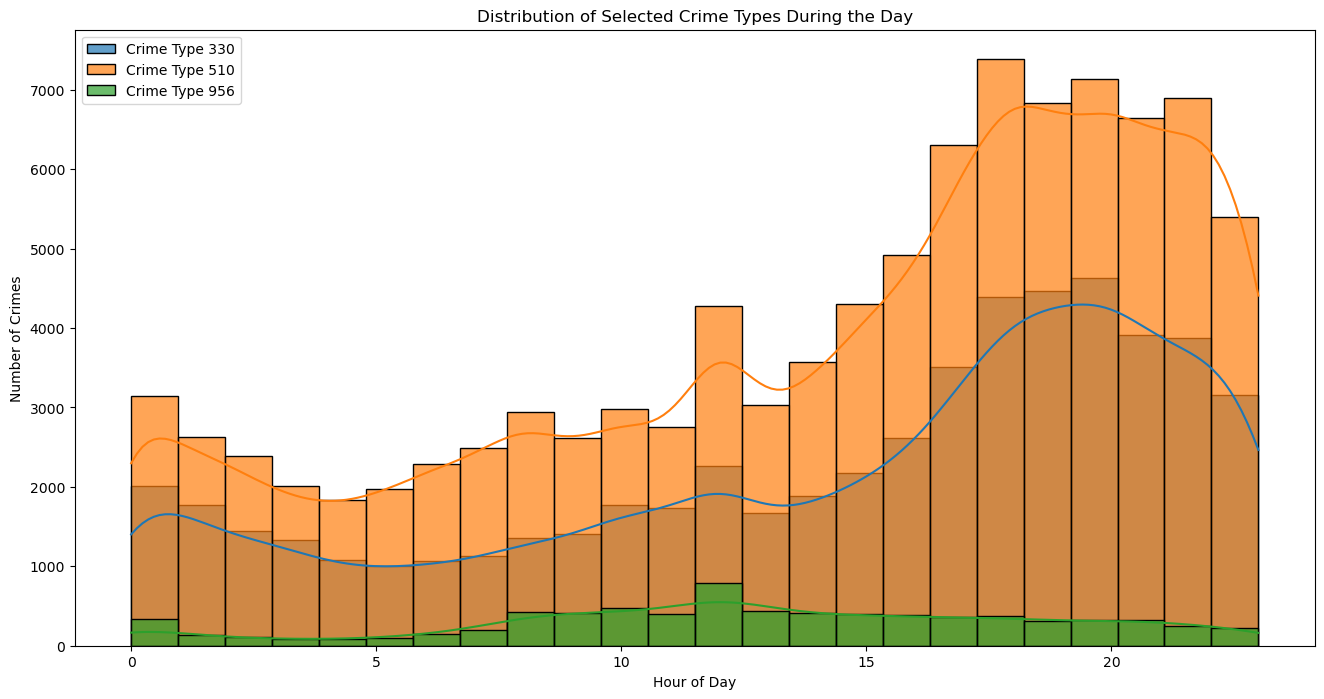

In [57]:
# Select a few crime types for analysis (adjust as needed)
selected_crime_types = [330, 510, 956]

# Plot the distribution of selected crime types during the day
plt.figure(figsize=(16, 8))
for crime_type in selected_crime_types:
    crime_subset = data[data['Crm Cd 1'] == crime_type]
    sns.histplot(crime_subset['Hour of Day'].dropna(), bins=24, kde=True, label=f'Crime Type {crime_type}', alpha=0.7)

plt.title('Distribution of Selected Crime Types During the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crimes')
plt.legend()
plt.show()

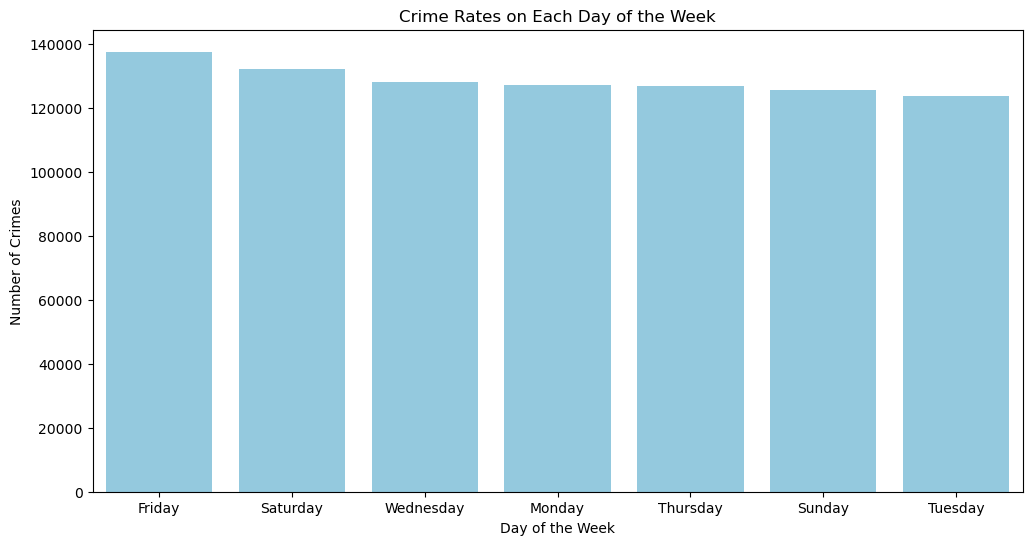

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the day of the week from the 'DATE OCC' column
data['Day of Week'] = data['DATE OCC'].dt.day_name()

# Group by day of the week and count the number of crimes
crimes_by_day = data['Day of Week'].value_counts()

# Plot the crime rates on each day of the week
plt.figure(figsize=(12, 6))
sns.barplot(x=crimes_by_day.index, y=crimes_by_day.values, color='skyblue')
plt.title('Crime Rates on Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.show()

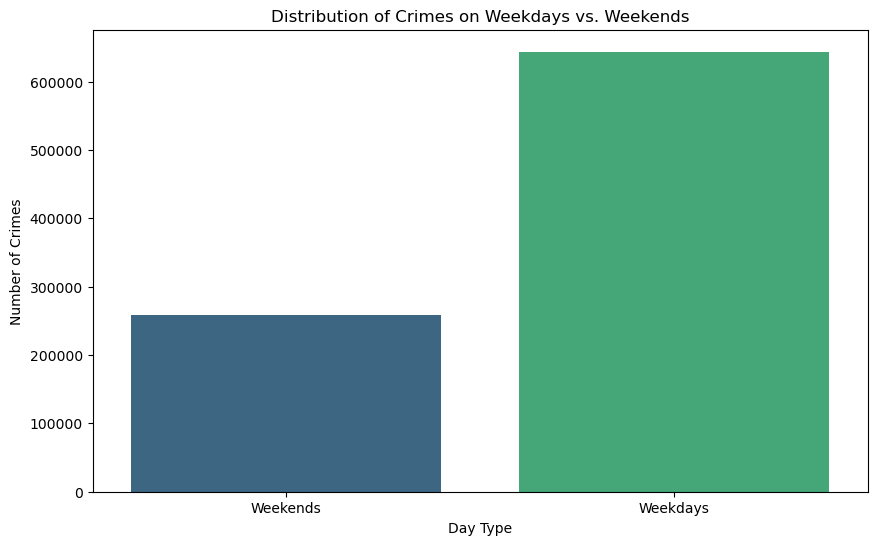

In [59]:
# Create a new column to identify weekdays and weekends
data['Day Type'] = data['DATE OCC'].dt.dayofweek.apply(lambda x: 'Weekends' if x >= 5 else 'Weekdays')

# Plot the distribution of crimes on weekdays vs. weekends
plt.figure(figsize=(10, 6))
sns.countplot(x='Day Type', data=data, palette='viridis')
plt.title('Distribution of Crimes on Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Number of Crimes')
plt.show()

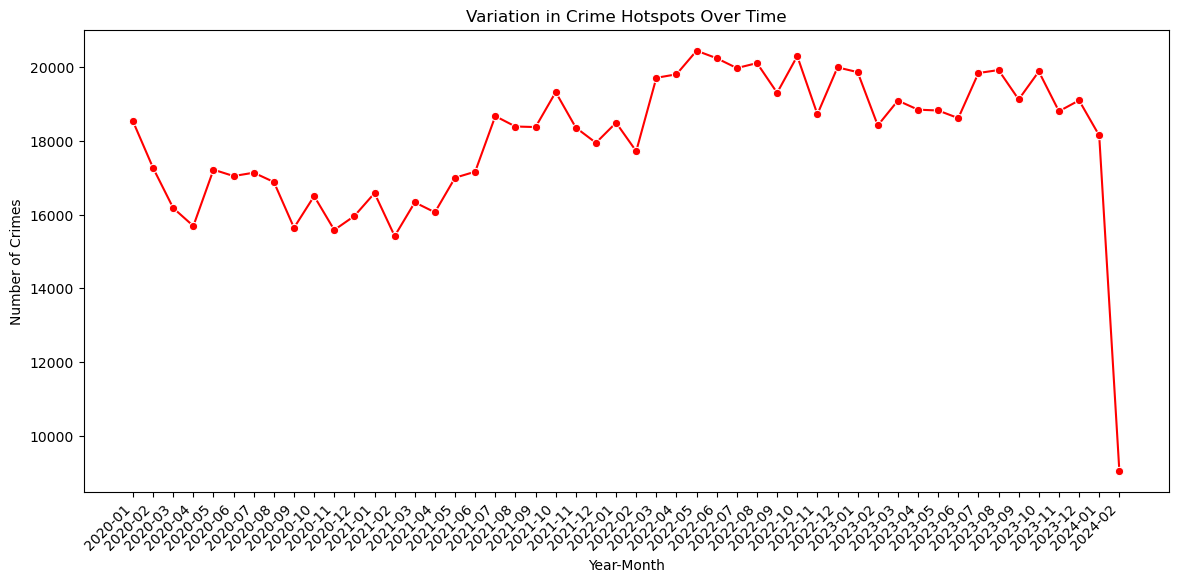

In [60]:
# Create a new column for the year-month of occurrence
data['YearMonth'] = data['DATE OCC'].dt.to_period('M')

# Group by year-month and count the number of crimes
crimes_by_month = data.groupby('YearMonth').size()

# Plot the variation in crime hotspots over time
plt.figure(figsize=(14, 6))
sns.lineplot(x=crimes_by_month.index.astype(str), y=crimes_by_month.values, marker='o', color='red')
plt.title('Variation in Crime Hotspots Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,Month,Crime Category
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,...,M,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,3,Theft
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,Central,182,1,330,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,2,Burglary
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,11,Other
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,...,M,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,3,Other
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,...,M,H,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,8,Theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,...,F,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,3,Assault
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,Hollywood,647,2,901,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,901.0,1500 N BRONSON AV,12,Other
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,Central,154,1,352,...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,7,Other
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,3,Other


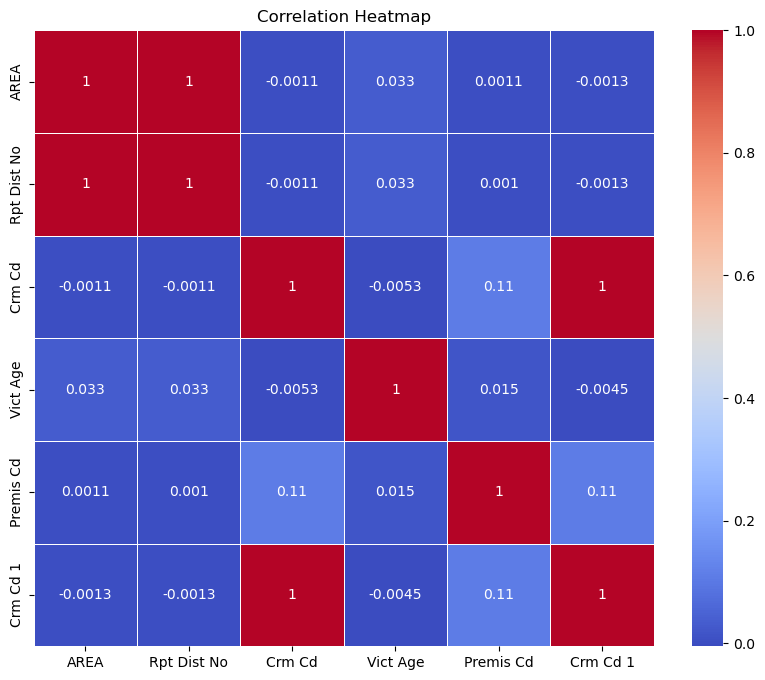

In [62]:
Selected_columns = ['AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age','Premis Cd', 'Crm Cd 1',]
Correlation_matrix = df[Selected_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(Correlation_matrix, annot= True, cmap= 'coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [63]:
df['Status Desc'].unique()

array(['Adult Arrest', 'Invest Cont', 'Juv Arrest', 'Adult Other',
       'Juv Other', 'UNK'], dtype=object)

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
label_encoder = LabelEncoder()
df['Status Desc new'] = label_encoder.fit_transform(df['Status Desc'])

In [66]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Descent,Premis Cd,Premis Desc,Status,Status Desc,Crm Cd 1,LOCATION,Month,Crime Category,Status Desc new
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,...,O,101.0,STREET,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,3,Theft,0
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,Central,182,1,330,...,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,Invest Cont,330.0,1000 S FLOWER ST,2,Burglary,2
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,...,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,480.0,1400 W 37TH ST,11,Other,2
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,...,O,405.0,CLOTHING STORE,IC,Invest Cont,343.0,14000 RIVERSIDE DR,3,Other,2
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,...,H,102.0,SIDEWALK,IC,Invest Cont,354.0,1900 TRANSIENT,8,Theft,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,...,H,102.0,SIDEWALK,IC,Invest Cont,230.0,12800 FILMORE ST,3,Assault,2
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,Hollywood,647,2,901,...,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,901.0,1500 N BRONSON AV,12,Other,2
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,Central,154,1,352,...,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,Invest Cont,352.0,500 S MAIN ST,7,Other,2
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,...,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,Invest Cont,745.0,14500 HARTLAND ST,3,Other,2


In [67]:
df['Status Desc new'].unique()

array([0, 2, 3, 1, 4, 5])

In [68]:
df.drop(['Status Desc'],axis=1,inplace=True)
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Vict Sex,Vict Descent,Premis Cd,Premis Desc,Status,Crm Cd 1,LOCATION,Month,Crime Category,Status Desc new
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,Wilshire,784,1,510,...,M,O,101.0,STREET,AA,510.0,1900 S LONGWOOD AV,3,Theft,0
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,Central,182,1,330,...,M,O,128.0,BUS STOP/LAYOVER (ALSO QUERY 124),IC,330.0,1000 S FLOWER ST,2,Burglary,2
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,Southwest,356,1,480,...,X,X,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,480.0,1400 W 37TH ST,11,Other,2
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,Van Nuys,964,1,343,...,M,O,405.0,CLOTHING STORE,IC,343.0,14000 RIVERSIDE DR,3,Other,2
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,Hollywood,666,2,354,...,M,H,102.0,SIDEWALK,IC,354.0,1900 TRANSIENT,8,Theft,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,Foothill,1602,1,230,...,F,H,102.0,SIDEWALK,IC,230.0,12800 FILMORE ST,3,Assault,2
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,Hollywood,647,2,901,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,901.0,1500 N BRONSON AV,12,Other,2
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,Central,154,1,352,...,F,H,735.0,NIGHT CLUB (OPEN EVENINGS ONLY),IC,352.0,500 S MAIN ST,7,Other,2
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,Van Nuys,914,2,745,...,F,H,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,745.0,14500 HARTLAND ST,3,Other,2


In [69]:
df['AREA NAME'].nunique()

21

In [70]:
df['AREA'].nunique()

21

In [71]:
df['LOCATION'].nunique()

65040

In [72]:
df.drop(['AREA NAME'],axis=1,inplace=True)

In [73]:
df.drop(['Premis Desc'],axis=1,inplace=True)

In [74]:
label_encoder = LabelEncoder()
df['Vict Sex new'] = label_encoder.fit_transform(df['Vict Sex'])

In [75]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Vict Sex,Vict Descent,Premis Cd,Status,Crm Cd 1,LOCATION,Month,Crime Category,Status Desc new,Vict Sex new
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,784,1,510,VEHICLE - STOLEN,...,M,O,101.0,AA,510.0,1900 S LONGWOOD AV,3,Theft,0,3
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,182,1,330,BURGLARY FROM VEHICLE,...,M,O,128.0,IC,330.0,1000 S FLOWER ST,2,Burglary,2,3
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,356,1,480,BIKE - STOLEN,...,X,X,502.0,IC,480.0,1400 W 37TH ST,11,Other,2,4
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,M,O,405.0,IC,343.0,14000 RIVERSIDE DR,3,Other,2,3
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,666,2,354,THEFT OF IDENTITY,...,M,H,102.0,IC,354.0,1900 TRANSIENT,8,Theft,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,F,H,102.0,IC,230.0,12800 FILMORE ST,3,Assault,2,1
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,647,2,901,VIOLATION OF RESTRAINING ORDER,...,F,H,502.0,IC,901.0,1500 N BRONSON AV,12,Other,2,1
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,154,1,352,PICKPOCKET,...,F,H,735.0,IC,352.0,500 S MAIN ST,7,Other,2,1
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,F,H,502.0,IC,745.0,14500 HARTLAND ST,3,Other,2,1


In [76]:
df['Vict Sex'].nunique()

5

In [77]:
df.drop(['Vict Sex'],axis=1,inplace=True)

In [78]:
df['Status'].nunique()

6

In [79]:
label_encoder = LabelEncoder()
df['Status new'] = label_encoder.fit_transform(df['Status'])

In [80]:
label_encoder = LabelEncoder()
df['Crime Category New'] = label_encoder.fit_transform(df['Crime Category'])

In [81]:
df['Crm Cd Desc'].nunique()

139

In [82]:
label_encoder = LabelEncoder()
df['Crm Cd Desc New'] = label_encoder.fit_transform(df['Crm Cd Desc'])

In [83]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Crm Cd 1,LOCATION,Month,Crime Category,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,784,1,510,VEHICLE - STOLEN,...,AA,510.0,1900 S LONGWOOD AV,3,Theft,0,3,0,3,133
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,182,1,330,BURGLARY FROM VEHICLE,...,IC,330.0,1000 S FLOWER ST,2,Burglary,2,3,3,1,21
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,356,1,480,BIKE - STOLEN,...,IC,480.0,1400 W 37TH ST,11,Other,2,4,3,2,11
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,343.0,14000 RIVERSIDE DR,3,Other,2,3,3,2,105
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,666,2,354,THEFT OF IDENTITY,...,IC,354.0,1900 TRANSIENT,8,Theft,2,3,3,3,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,1602,1,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",...,IC,230.0,12800 FILMORE ST,3,Assault,2,1,3,0,2
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,647,2,901,VIOLATION OF RESTRAINING ORDER,...,IC,901.0,1500 N BRONSON AV,12,Other,2,1,3,2,136
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,154,1,352,PICKPOCKET,...,IC,352.0,500 S MAIN ST,7,Other,2,1,3,2,88
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,914,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,745.0,14500 HARTLAND ST,3,Other,2,1,3,2,131


In [84]:
df.drop(['Crm Cd Desc'],axis=1,inplace=True)

In [85]:
label_encoder = LabelEncoder()
df['LOCATION New'] = label_encoder.fit_transform(df['LOCATION'])

In [86]:
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Mocodes,...,Crm Cd 1,LOCATION,Month,Crime Category,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New
0,0,190326475.0,2020-03-01,2020-03-01,2130,7,784,1,510,Unknown,...,510.0,1900 S LONGWOOD AV,3,Theft,0,3,0,3,133,21198
1,1,200106753.0,2020-02-09,2020-02-08,1800,1,182,1,330,1822 1402 0344,...,330.0,1000 S FLOWER ST,2,Burglary,2,3,3,1,21,1823
2,2,200320258.0,2020-11-11,2020-11-04,1700,3,356,1,480,0344 1251,...,480.0,1400 W 37TH ST,11,Other,2,4,3,2,11,13070
3,3,200907217.0,2023-05-10,2020-03-10,2037,9,964,1,343,0325 1501,...,343.0,14000 RIVERSIDE DR,3,Other,2,3,3,2,105,13260
4,4,220614831.0,2022-08-18,2020-08-17,1200,6,666,2,354,1822 1501 0930 2004,...,354.0,1900 TRANSIENT,8,Theft,2,3,3,3,115,21040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,901352,231606525.0,2023-03-22,2023-03-22,1000,16,1602,1,230,0416 0411 1822,...,230.0,12800 FILMORE ST,3,Assault,2,1,3,0,2,9839
901353,901353,230618716.0,2023-12-07,2023-12-01,1000,6,647,2,901,1814 0913 2038 1501,...,901.0,1500 N BRONSON AV,12,Other,2,1,3,2,136,14762
901354,901354,230115220.0,2023-07-02,2023-07-01,1,1,154,1,352,1822 0344,...,352.0,500 S MAIN ST,7,Other,2,1,3,2,88,39585
901355,901355,230906458.0,2023-03-05,2023-03-05,900,9,914,2,745,0329 1822,...,745.0,14500 HARTLAND ST,3,Other,2,1,3,2,131,13759


In [87]:
df['LOCATION New'].nunique()

65040

In [88]:
df.drop(['Crime Category','Status'],axis=1,inplace=True)

In [89]:
df['Mocodes'].head()

0                Unknown
1         1822 1402 0344
2              0344 1251
3              0325 1501
4    1822 1501 0930 2004
Name: Mocodes, dtype: object

In [90]:
df['Mocodes'].nunique()

295297

In [91]:
df['Vict Descent'].nunique()

20

In [92]:
df.drop(['Mocodes'],axis=1,inplace=True)

In [93]:
df.drop(['Unnamed: 0',],axis=1,inplace=True)

In [94]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'Rpt Dist No',
       'Part 1-2', 'Crm Cd', 'Vict Age', 'Vict Descent', 'Premis Cd',
       'Crm Cd 1', 'LOCATION', 'Month', 'Status Desc new', 'Vict Sex new',
       'Status new', 'Crime Category New', 'Crm Cd Desc New', 'LOCATION New'],
      dtype='object')

In [95]:
label_encoder = LabelEncoder()
df['Vict Descent New'] = label_encoder.fit_transform(df['Vict Descent'])

In [96]:
df.drop(['Vict Descent'], axis = 1, inplace = True)

In [117]:
df.drop(['LOCATION'], axis = 1, inplace = True)

In [118]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New
0,190326475.0,2020-03-01,2020-03-01,2130,7,784,1,510,40,101.0,510.0,3,0,3,0,3,133,21198,12
1,200106753.0,2020-02-09,2020-02-08,1800,1,182,1,330,47,128.0,330.0,2,2,3,3,1,21,1823,12
2,200320258.0,2020-11-11,2020-11-04,1700,3,356,1,480,19,502.0,480.0,11,2,4,3,2,11,13070,18
3,200907217.0,2023-05-10,2020-03-10,2037,9,964,1,343,19,405.0,343.0,3,2,3,3,2,105,13260,12
4,220614831.0,2022-08-18,2020-08-17,1200,6,666,2,354,28,102.0,354.0,8,2,3,3,3,115,21040,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,231606525.0,2023-03-22,2023-03-22,1000,16,1602,1,230,25,102.0,230.0,3,2,1,3,0,2,9839,7
901353,230618716.0,2023-12-07,2023-12-01,1000,6,647,2,901,30,502.0,901.0,12,2,1,3,2,136,14762,7
901354,230115220.0,2023-07-02,2023-07-01,1,1,154,1,352,24,735.0,352.0,7,2,1,3,2,88,39585,7
901355,230906458.0,2023-03-05,2023-03-05,900,9,914,2,745,53,502.0,745.0,3,2,1,3,2,131,13759,7


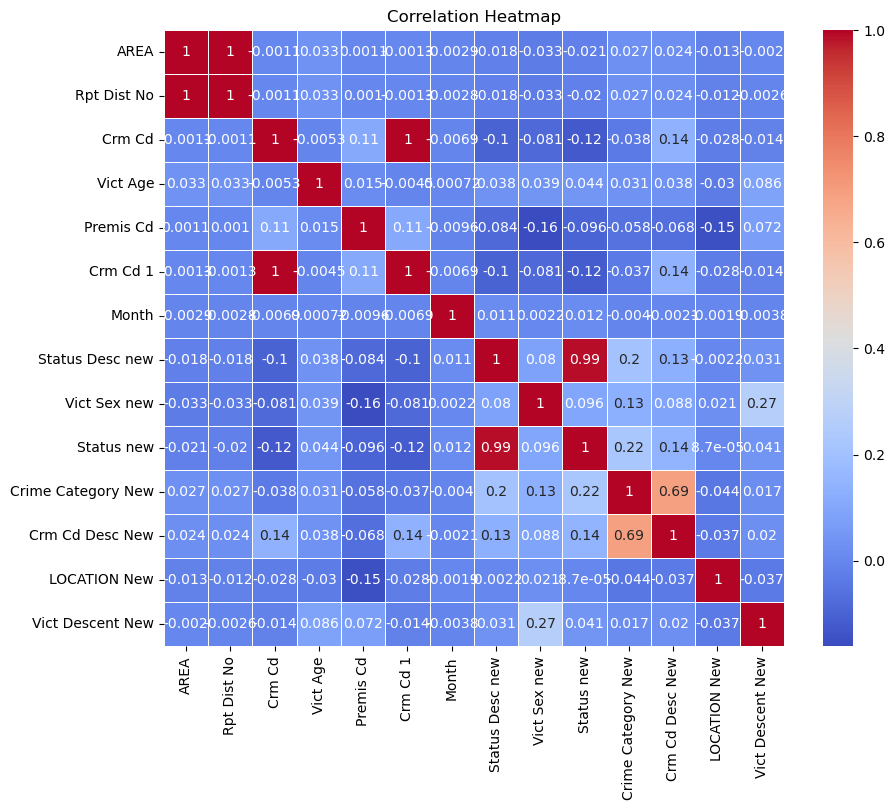

In [119]:
Selected_columns = ['AREA', 'Rpt Dist No', 'Crm Cd', 'Vict Age','Premis Cd', 'Crm Cd 1','Month','Status Desc new','Vict Sex new','Status new','Crime Category New','Crm Cd Desc New','LOCATION New','Vict Descent New']
Correlation_matrix = df[Selected_columns].corr()
plt.figure(figsize=(10,8))
sns.heatmap(Correlation_matrix, annot= True, cmap= 'coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [120]:
df.isna().sum()

DR_NO                 6
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Vict Age              0
Premis Cd             0
Crm Cd 1              0
Month                 0
Status Desc new       0
Vict Sex new          0
Status new            0
Crime Category New    0
Crm Cd Desc New       0
LOCATION New          0
Vict Descent New      0
dtype: int64

In [121]:
df1 = df.dropna(subset=['DR_NO'])

In [122]:
df1.isna().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Vict Age              0
Premis Cd             0
Crm Cd 1              0
Month                 0
Status Desc new       0
Vict Sex new          0
Status new            0
Crime Category New    0
Crm Cd Desc New       0
LOCATION New          0
Vict Descent New      0
dtype: int64

# Scaled the Data

In [123]:
df1['Date Rptd'].nunique()

1511

In [ ]:
df1['DATE OCC'].nunique()

1511

In [125]:
df1['Date Rptd'] = pd.to_datetime(df1['Date Rptd'])
df1['DATE OCC'] = pd.to_datetime(df1['DATE OCC'])

In [126]:
df1['Date Rptd'] = df1['Date Rptd'].apply(lambda x: x.timestamp())
df1['DATE OCC'] = df1['DATE OCC'].apply(lambda x: x.timestamp())

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)

In [129]:
data_scaled

array([[-2.34318759, -1.69218654, -1.6646231 , ...,  1.08835046,
        -0.64520335,  0.40850607],
       [-1.50964273, -1.74099721, -1.715701  , ..., -1.13060148,
        -1.68317123,  0.40850607],
       [-1.49144631, -1.09948557, -1.08883578, ..., -1.32872219,
        -1.08064092,  1.47448172],
       ...,
       [ 1.04789231,  1.13883223,  1.16091385, ...,  0.19680727,
         0.33983487, -0.47980697],
       [ 1.11532724,  0.86223844,  0.88695053, ...,  1.04872632,
        -1.04372944, -0.47980697],
       [ 1.06532688,  1.44331782,  1.46505957, ...,  0.67229697,
         0.15613464,  1.29681912]])

In [130]:
df1

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New
0,190326475.0,1.583021e+09,1.583021e+09,2130,7,784,1,510,40,101.0,510.0,3,0,3,0,3,133,21198,12
1,200106753.0,1.581206e+09,1.581120e+09,1800,1,182,1,330,47,128.0,330.0,2,2,3,3,1,21,1823,12
2,200320258.0,1.605053e+09,1.604448e+09,1700,3,356,1,480,19,502.0,480.0,11,2,4,3,2,11,13070,18
3,200907217.0,1.683677e+09,1.583798e+09,2037,9,964,1,343,19,405.0,343.0,3,2,3,3,2,105,13260,12
4,220614831.0,1.660781e+09,1.597622e+09,1200,6,666,2,354,28,102.0,354.0,8,2,3,3,3,115,21040,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,231606525.0,1.679443e+09,1.679443e+09,1000,16,1602,1,230,25,102.0,230.0,3,2,1,3,0,2,9839,7
901353,230618716.0,1.701907e+09,1.701389e+09,1000,6,647,2,901,30,502.0,901.0,12,2,1,3,2,136,14762,7
901354,230115220.0,1.688256e+09,1.688170e+09,1,1,154,1,352,24,735.0,352.0,7,2,1,3,2,88,39585,7
901355,230906458.0,1.677974e+09,1.677974e+09,900,9,914,2,745,53,502.0,745.0,3,2,1,3,2,131,13759,7


In [131]:
df1.isna().sum()

DR_NO                 0
Date Rptd             0
DATE OCC              0
TIME OCC              0
AREA                  0
Rpt Dist No           0
Part 1-2              0
Crm Cd                0
Vict Age              0
Premis Cd             0
Crm Cd 1              0
Month                 0
Status Desc new       0
Vict Sex new          0
Status new            0
Crime Category New    0
Crm Cd Desc New       0
LOCATION New          0
Vict Descent New      0
dtype: int64

In [132]:
from sklearn.cluster import KMeans

In [133]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(data_scaled)

In [136]:
df1.Cluster.value_counts()

Cluster
2    302929
1    226565
3    221642
0    150215
Name: count, dtype: int64

In [ ]:
inertia_values = []
K_range = range(2, 11)  # You can adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=42)
    kmeans.fit(data_scaled)
    
    # Inertia (within-cluster sum of squares)
    inertia_values.append(kmeans.inertia_)
    
    
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np



NameError: name 'KMeans' is not defined

In [138]:
list(K_range)

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [139]:
inertia_values

[14857514.096880706,
 13579834.498484109,
 12598223.103819285,
 12018183.990041452,
 11527315.578025745,
 11116660.073993312,
 10718453.77098243,
 10475061.52419912,
 10221645.823207874]

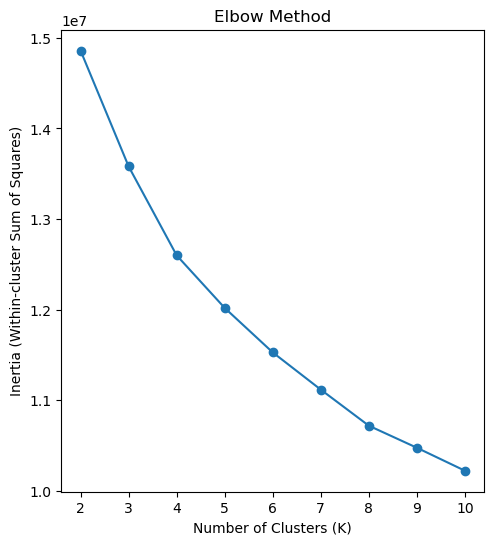

In [140]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

In [169]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(data_scaled)

In [170]:
df1

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New,Cluster
0,190326475.0,1.583021e+09,1.583021e+09,2130,7,784,1,510,40,101.0,510.0,3,0,3,0,3,133,21198,12,0
1,200106753.0,1.581206e+09,1.581120e+09,1800,1,182,1,330,47,128.0,330.0,2,2,3,3,1,21,1823,12,1
2,200320258.0,1.605053e+09,1.604448e+09,1700,3,356,1,480,19,502.0,480.0,11,2,4,3,2,11,13070,18,1
3,200907217.0,1.683677e+09,1.583798e+09,2037,9,964,1,343,19,405.0,343.0,3,2,3,3,2,105,13260,12,1
4,220614831.0,1.660781e+09,1.597622e+09,1200,6,666,2,354,28,102.0,354.0,8,2,3,3,3,115,21040,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,231606525.0,1.679443e+09,1.679443e+09,1000,16,1602,1,230,25,102.0,230.0,3,2,1,3,0,2,9839,7,2
901353,230618716.0,1.701907e+09,1.701389e+09,1000,6,647,2,901,30,502.0,901.0,12,2,1,3,2,136,14762,7,3
901354,230115220.0,1.688256e+09,1.688170e+09,1,1,154,1,352,24,735.0,352.0,7,2,1,3,2,88,39585,7,2
901355,230906458.0,1.677974e+09,1.677974e+09,900,9,914,2,745,53,502.0,745.0,3,2,1,3,2,131,13759,7,3


<Axes: xlabel='Cluster', ylabel='count'>

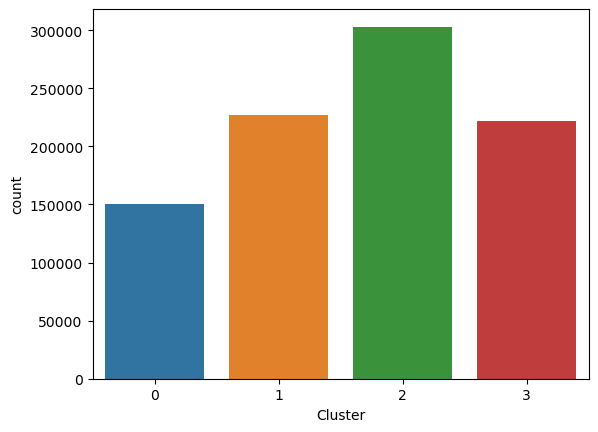

In [171]:
sns.countplot(x='Cluster', data=df1)

In [149]:
df2 = df1[df1["Cluster"]==0] 
df2

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New,Cluster
5,231808869.0,1.680566e+09,1.606781e+09,2300,18,1826,2,354,41,501.0,354.0,12,2,3,3,3,115,56395,7,0
6,230110144.0,1.680566e+09,1.593734e+09,900,1,182,2,354,25,502.0,354.0,7,2,3,3,3,115,5132,7,0
8,231309864.0,1.682640e+09,1.607472e+09,1400,13,1375,2,354,24,750.0,354.0,12,2,1,3,3,115,10511,2,0
16,230312288.0,1.685578e+09,1.580602e+09,315,3,391,2,354,56,502.0,354.0,2,2,3,3,3,115,36444,2,0
17,231805781.0,1.675382e+09,1.593562e+09,805,18,1802,2,354,22,502.0,354.0,7,2,1,3,3,115,35455,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901344,230804266.0,1.673136e+09,1.673136e+09,1030,8,839,1,341,48,717.0,341.0,1,2,3,3,2,122,2665,12,0
901347,231615006.0,1.702598e+09,1.702512e+09,1105,16,1608,1,210,65,102.0,210.0,12,1,1,1,2,99,5448,17,0
901352,231606525.0,1.679443e+09,1.679443e+09,1000,16,1602,1,230,25,102.0,230.0,3,2,1,3,0,2,9839,7,0
901354,230115220.0,1.688256e+09,1.688170e+09,1,1,154,1,352,24,735.0,352.0,7,2,1,3,2,88,39585,7,0


In [150]:
df3 = df1[df1["Cluster"]==1] 
df3

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New,Cluster
9,211904005.0,1.609373e+09,1.609373e+09,1220,19,1974,2,624,26,502.0,624.0,12,2,3,3,0,4,54646,7,1
11,221908151.0,1.649722e+09,1.601510e+09,1,19,1988,1,821,8,501.0,812.0,10,2,1,3,2,108,11680,7,1
12,230204214.0,1.672877e+09,1.580515e+09,800,2,201,2,812,7,502.0,812.0,2,2,1,3,2,39,54317,17,1
13,230409878.0,1.687133e+09,1.586563e+09,1200,4,417,2,812,8,501.0,812.0,4,2,1,3,2,39,37112,7,1
15,230207571.0,1.678925e+09,1.577837e+09,1500,2,271,2,810,13,502.0,810.0,1,3,1,4,2,101,54418,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901349,240904007.0,1.703981e+09,1.703981e+09,230,9,952,2,745,40,122.0,745.0,12,1,4,1,2,131,15485,18,1
901350,230115595.0,1.688774e+09,1.688774e+09,1230,1,111,2,626,35,501.0,626.0,7,1,3,1,0,73,50500,17,1
901351,231604807.0,1.674778e+09,1.674691e+09,1800,16,1663,2,740,23,122.0,740.0,1,2,3,3,1,130,9308,7,1
901353,230618716.0,1.701907e+09,1.701389e+09,1000,6,647,2,901,30,502.0,901.0,12,2,1,3,2,136,14762,7,1


In [151]:
df4 = df1[df1["Cluster"]==2] 
df4

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New,Cluster
0,190326475.0,1.583021e+09,1.583021e+09,2130,7,784,1,510,40,101.0,510.0,3,0,3,0,3,133,21198,12,2
1,200106753.0,1.581206e+09,1.581120e+09,1800,1,182,1,330,47,128.0,330.0,2,2,3,3,1,21,1823,12,2
2,200320258.0,1.605053e+09,1.604448e+09,1700,3,356,1,480,19,502.0,480.0,11,2,4,3,2,11,13070,18,2
3,200907217.0,1.683677e+09,1.583798e+09,2037,9,964,1,343,19,405.0,343.0,3,2,3,3,2,105,13260,12,2
4,220614831.0,1.660781e+09,1.597622e+09,1200,6,666,2,354,28,102.0,354.0,8,2,3,3,3,115,21040,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
637563,220404131.0,1.641341e+09,1.641254e+09,1315,4,411,1,210,47,101.0,210.0,1,0,3,0,2,99,63266,7,2
639502,221305319.0,1.643328e+09,1.643328e+09,1200,13,1347,1,230,53,158.0,230.0,1,0,1,0,0,2,56636,12,2
639648,220304100.0,1.641168e+09,1.641168e+09,935,3,361,1,230,39,103.0,230.0,1,0,3,0,0,2,38401,7,2
641695,222004605.0,1.642291e+09,1.642291e+09,1845,20,2005,1,230,30,102.0,230.0,1,1,3,1,0,2,60468,7,2


In [172]:
df1

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New,Cluster
0,190326475.0,1.583021e+09,1.583021e+09,2130,7,784,1,510,40,101.0,510.0,3,0,3,0,3,133,21198,12,0
1,200106753.0,1.581206e+09,1.581120e+09,1800,1,182,1,330,47,128.0,330.0,2,2,3,3,1,21,1823,12,1
2,200320258.0,1.605053e+09,1.604448e+09,1700,3,356,1,480,19,502.0,480.0,11,2,4,3,2,11,13070,18,1
3,200907217.0,1.683677e+09,1.583798e+09,2037,9,964,1,343,19,405.0,343.0,3,2,3,3,2,105,13260,12,1
4,220614831.0,1.660781e+09,1.597622e+09,1200,6,666,2,354,28,102.0,354.0,8,2,3,3,3,115,21040,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
901352,231606525.0,1.679443e+09,1.679443e+09,1000,16,1602,1,230,25,102.0,230.0,3,2,1,3,0,2,9839,7,2
901353,230618716.0,1.701907e+09,1.701389e+09,1000,6,647,2,901,30,502.0,901.0,12,2,1,3,2,136,14762,7,3
901354,230115220.0,1.688256e+09,1.688170e+09,1,1,154,1,352,24,735.0,352.0,7,2,1,3,2,88,39585,7,2
901355,230906458.0,1.677974e+09,1.677974e+09,900,9,914,2,745,53,502.0,745.0,3,2,1,3,2,131,13759,7,3


In [158]:
df1.to_csv('Cluster_data.csv')

In [ ]:
## training and Testing using decision tree

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [174]:
X = df1.drop(['Cluster'], axis=1)
y = df1[['Cluster']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3)

In [175]:
X_train

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New
750643,230707505.0,1.679530e+09,1.679443e+09,2030,7,774,1,330,36,101.0,330.0,3,2,3,3,1,21,18180,7
522444,220410123.0,1.655856e+09,1.655856e+09,1655,4,497,1,442,20,203.0,442.0,6,2,3,3,2,104,29771,7
109626,200315161.0,1.596326e+09,1.593562e+09,1200,3,337,2,624,79,501.0,624.0,7,1,1,1,0,4,19833,7
125068,200904660.0,1.579133e+09,1.579046e+09,700,9,964,1,330,45,108.0,330.0,1,2,1,3,1,21,59965,17
195884,200707942.0,1.585526e+09,1.585526e+09,345,7,722,2,745,31,203.0,745.0,3,2,3,3,2,131,52385,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266303,211224438.0,1.638403e+09,1.638403e+09,1519,12,1265,1,421,41,101.0,421.0,12,2,3,3,2,111,51886,7
416572,221223854.0,1.668902e+09,1.668902e+09,520,12,1245,1,210,19,122.0,210.0,11,2,1,3,2,99,46568,7
560919,220310234.0,1.651709e+09,1.648598e+09,1710,3,391,1,440,70,222.0,440.0,3,2,1,3,3,117,36189,2
652981,241504117.0,1.704154e+09,1.704154e+09,1018,15,1555,2,930,30,203.0,930.0,1,2,3,3,2,38,38265,12


In [176]:
X_test

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Crm Cd 1,Month,Status Desc new,Vict Sex new,Status new,Crime Category New,Crm Cd Desc New,LOCATION New,Vict Descent New
579698,221908268.0,1.649894e+09,1.649894e+09,600,19,1964,2,930,62,501.0,930.0,4,0,1,0,2,38,54824,7
736546,230206310.0,1.676678e+09,1.676592e+09,1650,2,246,2,624,51,101.0,624.0,2,2,1,3,0,4,43590,7
36146,200715736.0,1.604707e+09,1.604534e+09,2000,7,706,1,310,37,707.0,310.0,11,2,3,3,1,20,50986,7
259295,210400918.0,1.626394e+09,1.626394e+09,230,4,422,1,236,33,104.0,236.0,7,1,1,1,2,72,23120,7
878998,231100612.0,1.680566e+09,1.680480e+09,2304,11,1117,1,420,24,104.0,420.0,4,2,1,3,3,113,25613,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250244,210310163.0,1.620605e+09,1.619827e+09,800,3,358,2,354,33,722.0,354.0,5,2,1,3,3,115,54507,12
440610,232104356.0,1.673395e+09,1.671840e+09,900,21,2161,2,901,35,501.0,901.0,12,2,3,3,2,136,27351,17
748612,230710646.0,1.686269e+09,1.686269e+09,1550,7,747,1,310,67,504.0,310.0,6,2,3,3,1,20,54413,1
729115,230311687.0,1.685491e+09,1.685491e+09,722,3,334,2,647,36,101.0,647.0,5,2,1,3,2,124,58337,7


In [177]:
y_train

,Cluster
750643,2
522444,2
109626,0
125068,1
195884,3
...,...
266303,1
416572,2
560919,2
652981,3


In [178]:
y_test

,Cluster
579698,0
736546,3
36146,1
259295,1
878998,2
...,...
250244,1
440610,3
748612,2
729115,3


In [ ]:
#DECISION TREE CLASSIFIER

In [ ]:
model_dt = DecisionTreeClassifier(criterion="entropy")
model_dt.fit(X_train, y_train)
y_pred = model_dt.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45140
           1       1.00      1.00      1.00     67610
           2       1.00      1.00      1.00     90908
           3       1.00      1.00      1.00     66748

    accuracy                           1.00    270406
   macro avg       1.00      1.00      1.00    270406
weighted avg       1.00      1.00      1.00    270406



In [257]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error: (MSE) {mse:.2f}')
print(f'R-squared (R²) score: {r2:.2f}')

Mean Absolute Error (MAE): 0.01
Mean Squared Error: (MSE) 0.02
R-squared (R²) score: 0.98


In [258]:
print(metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9960503834974076


In [ ]:
#LOGISTIC REGRESSION

In [259]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [260]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [261]:
y_pred1 = model_lr.predict(X_test)

# Print the prediction accuracy

accuracy_score(y_test, y_pred1)

0.5265896466794376

In [262]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     45140
           1       0.56      0.81      0.66     67610
           2       0.60      0.85      0.70     90908
           3       0.23      0.16      0.19     66748

    accuracy                           0.53    270406
   macro avg       0.35      0.45      0.39    270406
weighted avg       0.40      0.53      0.45    270406



In [263]:
print(metrics.accuracy_score(y_test, y_pred1))

0.5265896466794376


In [264]:
mse = mean_squared_error(y_test, y_pred1)
mae = mean_absolute_error(y_test, y_pred1)
r2 = r2_score(y_test, y_pred1)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error: (MSE) {mse:.2f}')
print(f'R-squared (R²) score: {r2:.2f}')

Mean Absolute Error (MAE): 0.73
Mean Squared Error: (MSE) 1.31
R-squared (R²) score: -0.24


In [ ]:
#RANDOM FOREST CLASSIFIER

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [266]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [267]:
from sklearn import metrics
y_pred2 = model_rf.predict(X_test)

In [268]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     45140
           1       1.00      1.00      1.00     67610
           2       1.00      1.00      1.00     90908
           3       1.00      1.00      1.00     66748

    accuracy                           1.00    270406
   macro avg       1.00      1.00      1.00    270406
weighted avg       1.00      1.00      1.00    270406



In [269]:
print(metrics.accuracy_score(y_test, y_pred2))

0.9973410353320562


In [270]:
mse = mean_squared_error(y_test, y_pred2)
mae = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error: (MSE) {mse:.2f}')
print(f'R-squared (R²) score: {r2:.2f}')

Mean Absolute Error (MAE): 0.01
Mean Squared Error: (MSE) 0.01
R-squared (R²) score: 0.99


In [205]:
#ADA BOOST

In [275]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [276]:
model_ada = AdaBoostClassifier()
model_ada.fit(X_train, y_train)

AdaBoostClassifier()

In [277]:
y_pred3 = model_ada.predict(X_test)

In [278]:
print(metrics.accuracy_score(y_test, y_pred3))

0.923533501475559


In [279]:
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92     45140
           1       0.84      0.98      0.90     67610
           2       0.96      0.96      0.96     90908
           3       0.93      0.86      0.90     66748

    accuracy                           0.92    270406
   macro avg       0.93      0.92      0.92    270406
weighted avg       0.93      0.92      0.92    270406



In [280]:
mse = mean_squared_error(y_test, y_pred3)
mae = mean_absolute_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error: (MSE) {mse:.2f}')
print(f'R-squared (R²) score: {r2:.2f}')

Mean Absolute Error (MAE): 0.14
Mean Squared Error: (MSE) 0.30
R-squared (R²) score: 0.72
